In [33]:
%matplotlib inline
%matplotlib notebook

In [34]:
import os 
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading In Data

In [35]:

PATH = os.path.abspath(os.path.join(os.path.dirname("."), "Data"))
FINAL_DATA = os.path.join(PATH, "Sample_Size_1661.csv")

FINAL_DATA

'/Users/wrangamujadidi/Desktop/Capstone/capstone_opioid/Data/Sample_Size_1661.csv'

In [36]:
data = pd.read_csv(FINAL_DATA)

In [37]:
#Drop the columns for HexandMonth and TotalNarcan.  HEXandMonth is not needed and TotalNarcan may cause bias because
#the Narcan Administered already accounts for the TotalNarcan for the month. 

data = data.drop(['HexandMonth'], axis=1)
data = data.drop(['TotalNarcan'], axis=1)

In [38]:
data.columns

Index(['HexagonNumber', 'Month', 'Under20', '20to29', '30to39', '40to49',
       '50to59', '60to69', '70andabove', 'NarcanAdministered', 'Male',
       'Female', 'MPDCalls', 'FEMSCalls', 'MedicalCalls', 'MiscCals',
       'OverdoseCalls', 'PropertyCalls', 'QOLCalls', 'TrafficCalls',
       'ViolentCalls', 'AverageTemperature', 'AverageHumidity',
       'AveragePrecipitation', 'Unemployment'],
      dtype='object')

# Test Train Split

In [39]:
features = data [[
     'MPDCalls', 'FEMSCalls', 'MedicalCalls', 'MiscCals',
       'OverdoseCalls', 'PropertyCalls', 'QOLCalls', 'TrafficCalls',
       'ViolentCalls'
]]

X = features

y = data['NarcanAdministered']

print(X.shape)
print(y.shape)

(3322, 9)
(3322,)


In [40]:

from sklearn.model_selection import train_test_split as tts 
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

# Estimator

In [45]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline


def model_selection(X_test, y_test, estimator):
    """
    Test various estimators.
    """ 
    model = estimator 
    # Instantiate the classification model and visualizer
    model.fit(X_test, y_test) 
    
    expected  = y_test
    y_pred = model.predict(X_test)
    
    # Compute and return the F1 score (the harmonic mean of precision and recall)
    return (f1_score(expected, y_pred))

# Models

In [46]:
# Try them all!
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

In [47]:
model_selection(X_test, y_test, LinearSVC())

0.60447761194029848

In [48]:
model_selection(X_test, y_test, SVC())

0.88628762541806028

In [49]:
model_selection(X_test, y_test, SGDClassifier())

0.65792129162462154

In [50]:
model_selection(X_test, y_test, KNeighborsClassifier())

0.65108514190317202

In [51]:
model_selection(X_test, y_test,BaggingClassifier())

0.89632107023411378

In [52]:
model_selection(X_test, y_test, ExtraTreesClassifier())

0.90452261306532666

In [53]:
model_selection(X_test, y_test, RandomForestClassifier())

0.88851351351351349

# Visuals

In [63]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport


def visual_model_selection(X_test, y_test, X_train, y_train, model):
    

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(model)
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    g = visualizer.poof()  


<IPython.core.display.Javascript object>


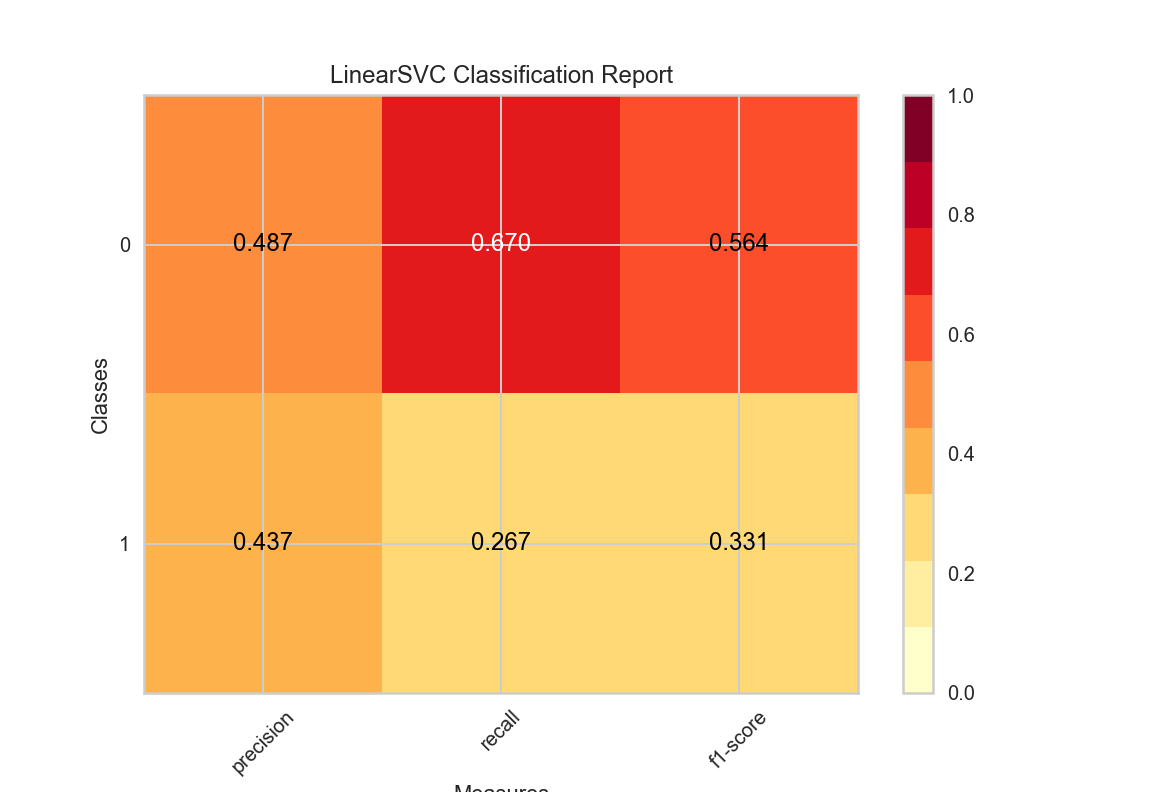

In [65]:
visual_model_selection(X_test, y_test, X_train, y_train, LinearSVC())

<IPython.core.display.Javascript object>


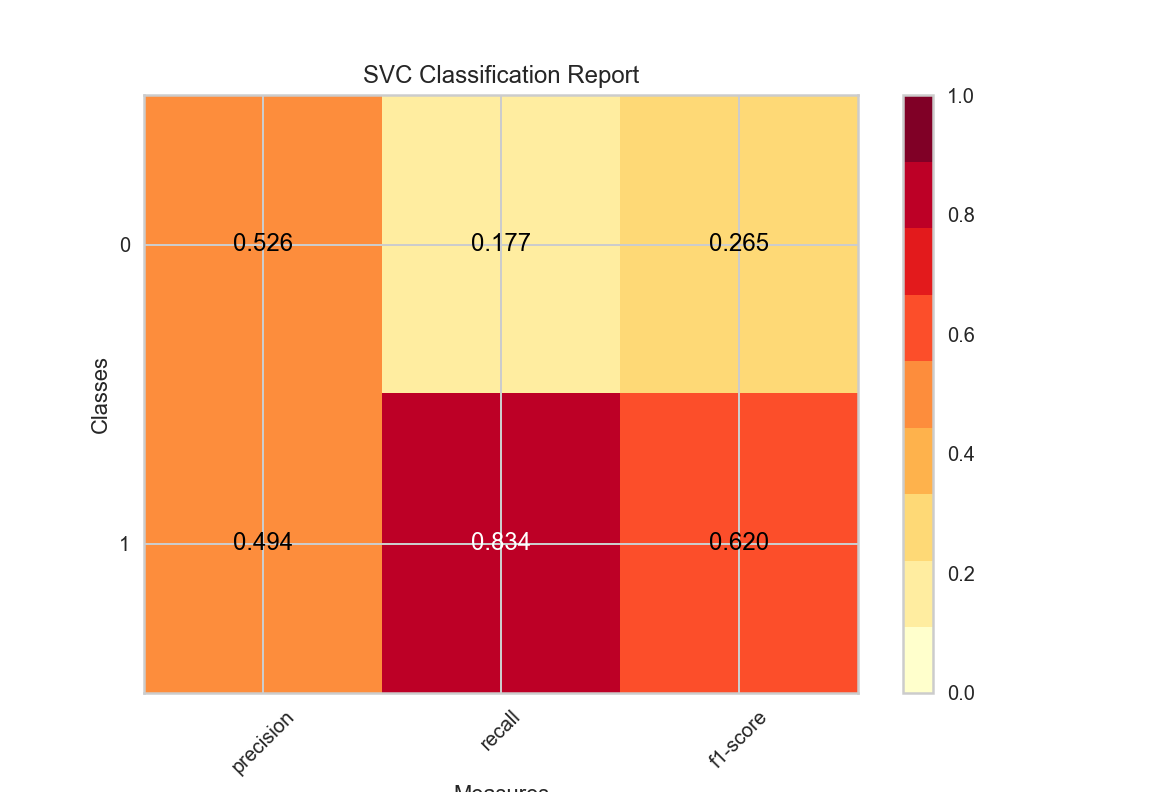

In [66]:
visual_model_selection(X_test, y_test, X_train, y_train, SVC())

<IPython.core.display.Javascript object>


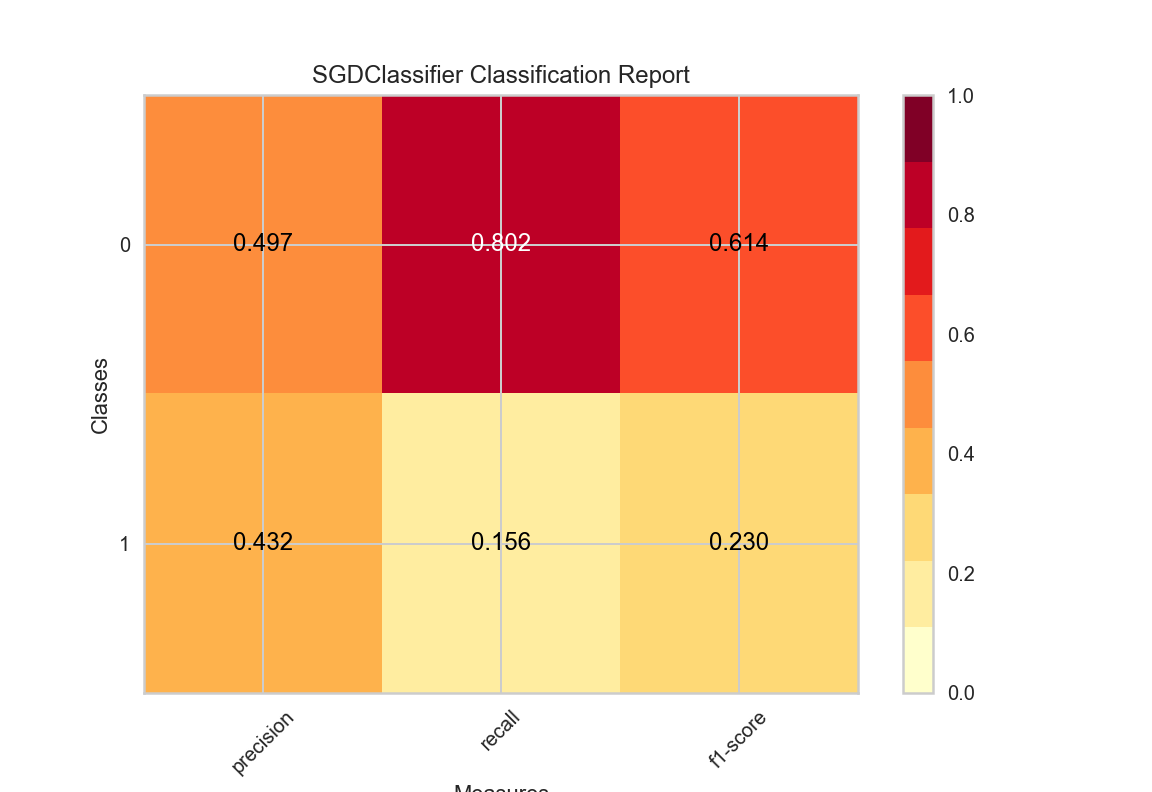

In [67]:
visual_model_selection(X_test, y_test, X_train, y_train, SGDClassifier())

<IPython.core.display.Javascript object>


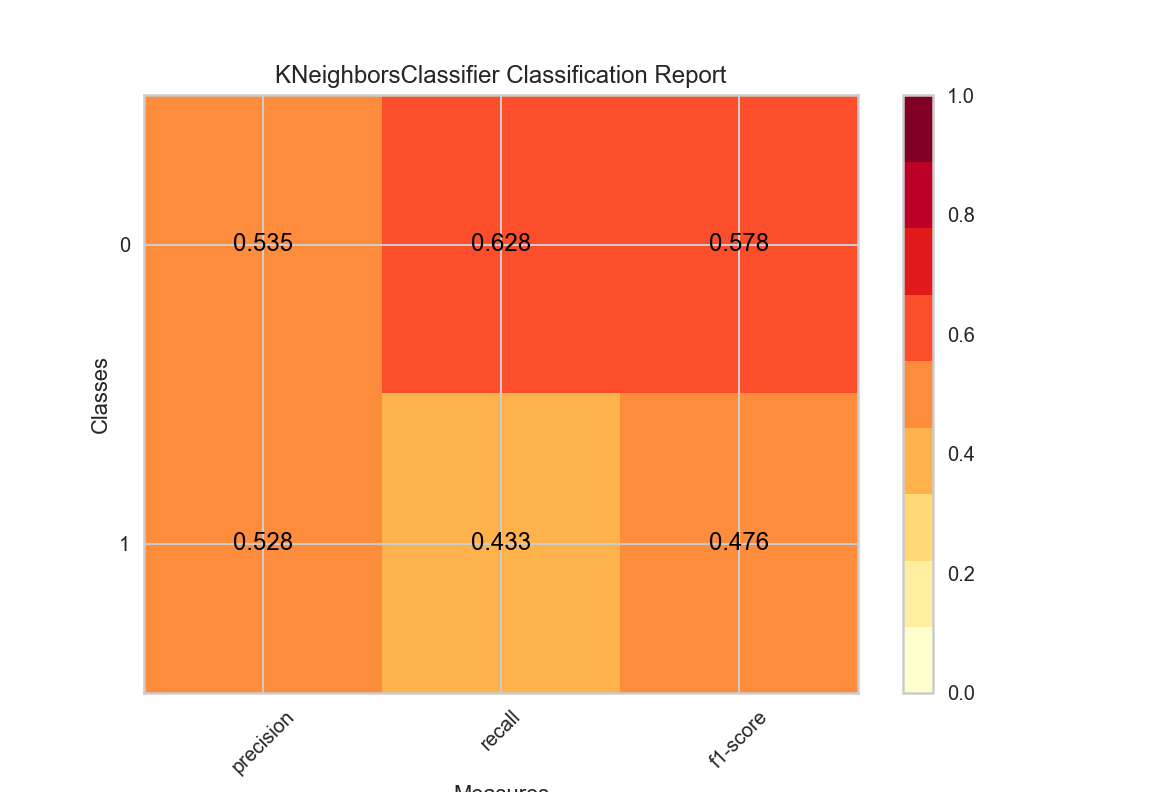

In [68]:
visual_model_selection(X_test, y_test, X_train, y_train, KNeighborsClassifier())

<IPython.core.display.Javascript object>


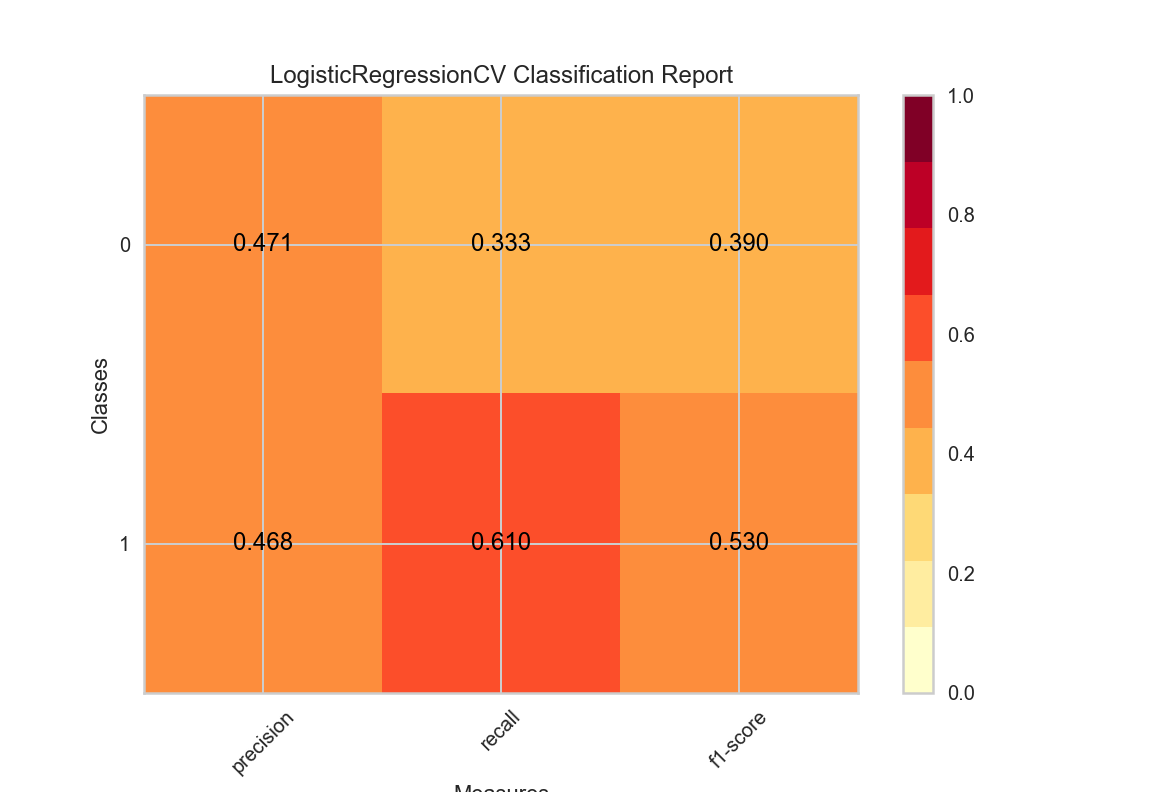

In [69]:
visual_model_selection(X_test, y_test, X_train, y_train, LogisticRegressionCV())

<IPython.core.display.Javascript object>


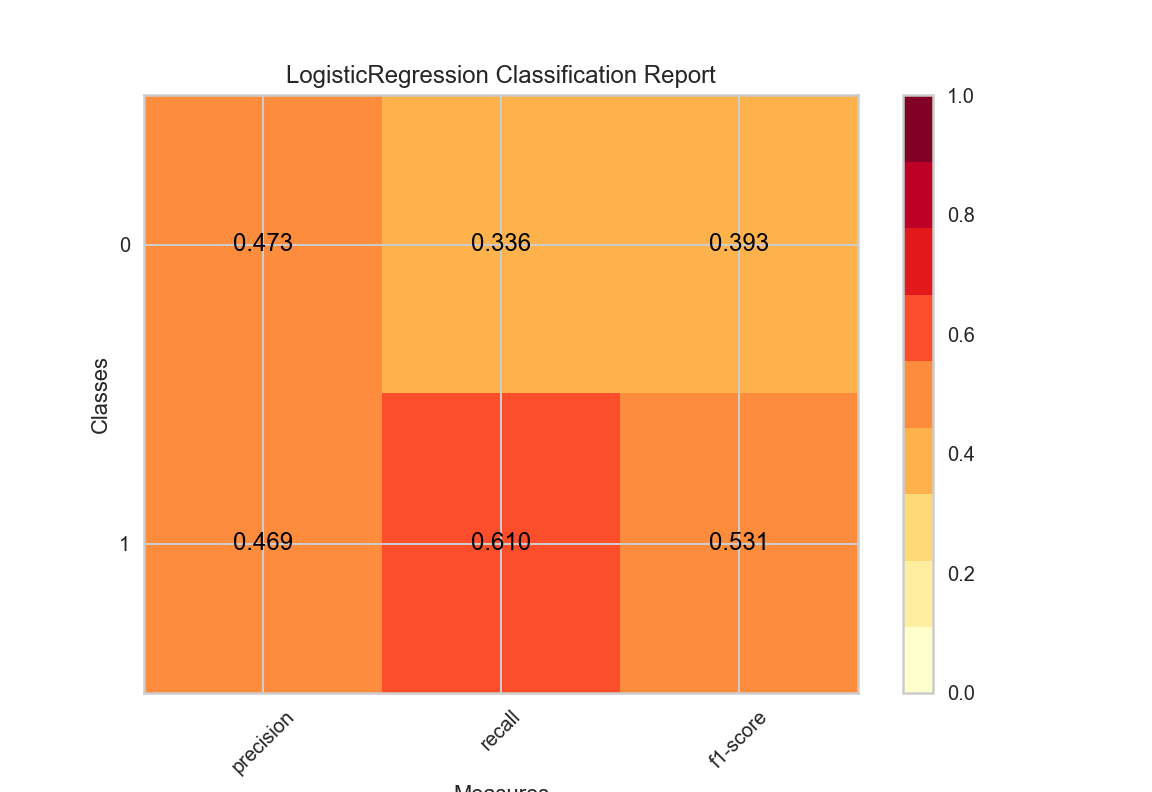

In [70]:
visual_model_selection(X_test, y_test, X_train, y_train, LogisticRegression())

<IPython.core.display.Javascript object>


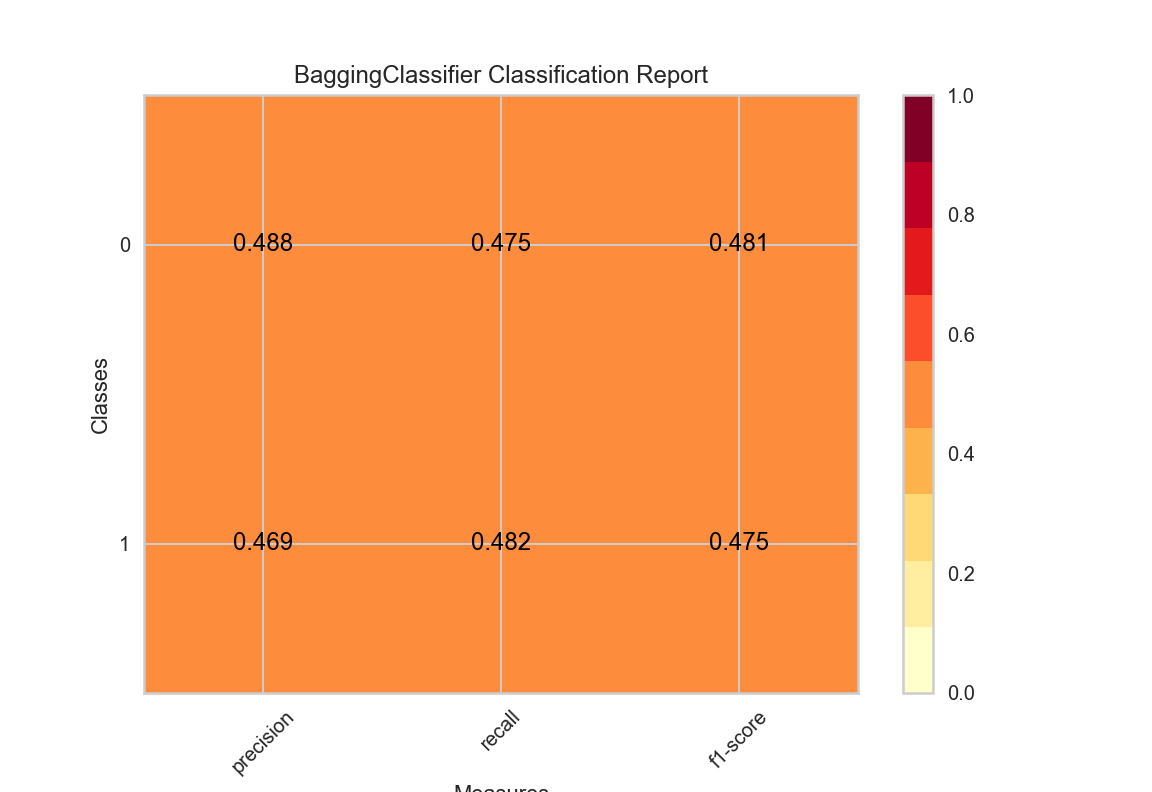

In [71]:
visual_model_selection(X_test, y_test, X_train, y_train, BaggingClassifier())


<IPython.core.display.Javascript object>


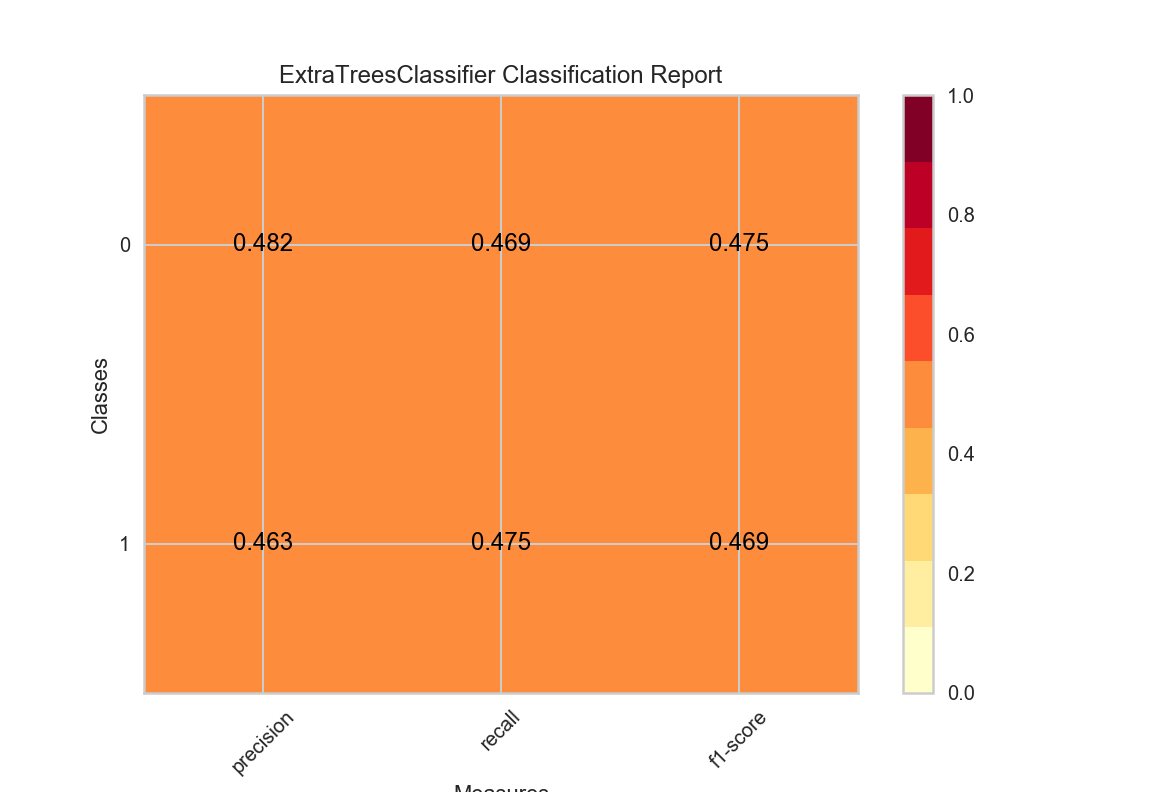

In [72]:
visual_model_selection(X_test, y_test, X_train, y_train, ExtraTreesClassifier())


<IPython.core.display.Javascript object>


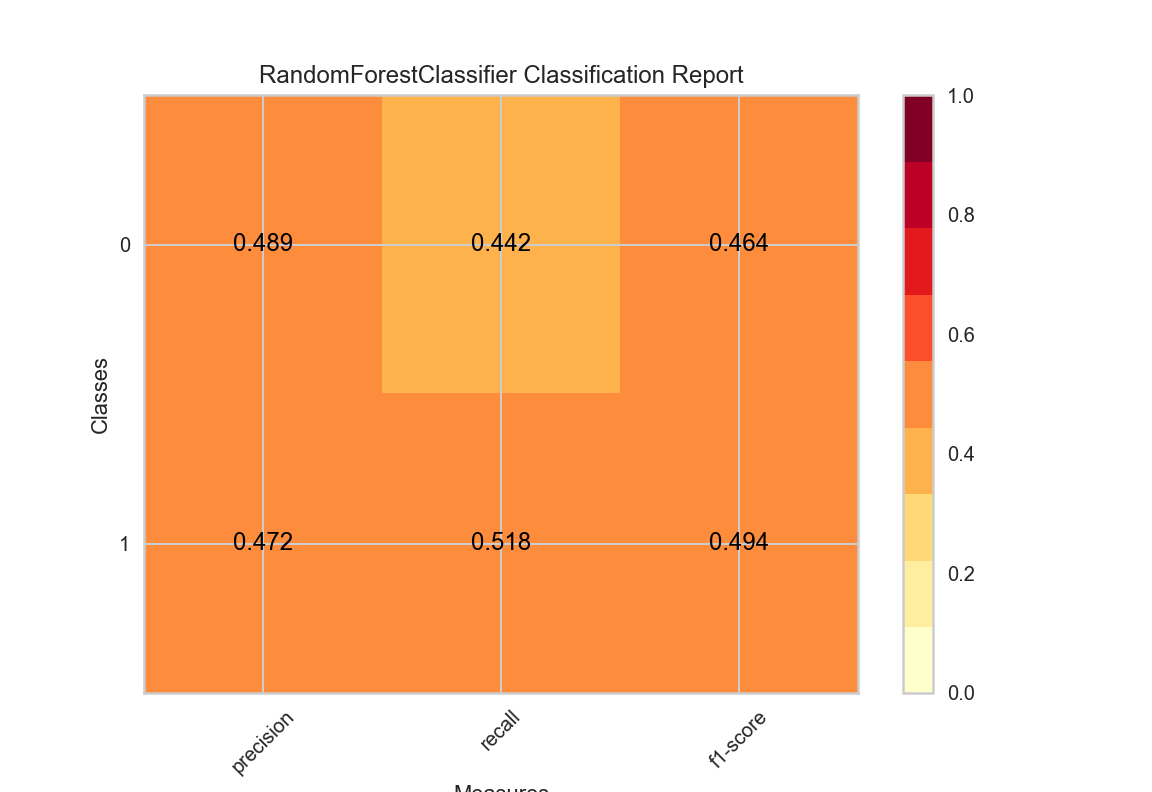

In [73]:
visual_model_selection(X_test, y_test, X_train, y_train, RandomForestClassifier())